In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Function to create columns in DF
def df_construct(fare = 50, rate=-2, year_beg = 2020, year_end = 2061, time_interval = 1):
  df = pd.DataFrame(columns = columns)
  df.iloc[:, 0] = np.arange(year_beg, year_end, time_interval)
  df.iloc[:, 1] = df.iloc[:, 0] - year_beg
  df.iloc[0, 2] = fare*12
  df.iloc[1:, 2] = fare*12*df.iloc[1:, 1]
  df.iloc[0, 3] = df.iloc[0, 2]
  df.iloc[1:,3] = df.iloc[1:,2] * (pow(1+rate/100, df.iloc[1:, 1]))
  return df

In [18]:
# Nonrefundable fare for 50 000 CAD insurance
year_beg = 2020
year_end = 2061
years = year_end - year_beg

time_interval = 1
rate = -2
fare_nonref = 84
yearly_paid_nonref = fare_nonref*12
columns = ['year', 'years_passed','total_nonref', 'CI_incl_nonref']

ins_nonref = df_construct(fare_nonref, rate)
ins_nonref.head(2)

,year,years_passed,total_nonref,CI_incl_nonref
0,2020,0,1008,1008
1,2021,1,1008,987.84


In [19]:
# Refundable fare for 50 000 CAD insurance
fare_ref = 139
yearly_paid_ref = fare_ref*12
yearly_dif = yearly_paid_ref - yearly_paid_nonref

columns = ['year', 'years_passed','total_ref', 'CI_incl_ref']

ins_ref = df_construct(fare_ref)
ins_ref = ins_ref[['total_ref', 'CI_incl_ref']]
ins_ref.head(2)

,total_ref,CI_incl_ref
0,1668,1668
1,1668,1634.64


In [20]:
# Concatenate both DF for analysis
ins = pd.concat([ins_nonref, ins_ref], axis=1)
ins['total_dif'] = ins['total_ref']-ins['total_nonref']
ins.to_csv(r'files/Investment_concatenated.csv', index=False)
ins.tail()

,year,years_passed,total_nonref,CI_incl_nonref,total_ref,CI_incl_ref,total_dif
36,2056,36,36288,17534.8,60048,29016,23760
37,2057,37,37296,17661.5,61716,29225.5,24420
38,2058,38,38304,17776,63384,29415.1,25080
39,2059,39,39312,17879,65052,29585.4,25740
40,2060,40,40320,17970.6,66720,29737.1,26400


In [21]:
### INVESTMENT 5% COLUMNS ADDING ###

ins = pd.read_csv(r'files/Investment_concatenated.csv')

inv_5pct = 0.05

for i in range(years):
    if ins.index[i] == 0:
        ins['start_balance_5pct'] = 0
        ins['interest_5pct'] = ins.start_balance_5pct[i]*inv_5pct       
        ins['end_balance_5pct'] = yearly_dif

    else:
        ins.loc[i, 'start_balance_5pct'] = ins.end_balance_5pct[i-1]
        ins.loc[i, 'interest_5pct'] = ins.start_balance_5pct[i]*inv_5pct
        ins.loc[i, 'end_balance_5pct'] = ins.start_balance_5pct[i] + ins.interest_5pct[i] + yearly_dif

ins.tail()

,year,years_passed,total_nonref,CI_incl_nonref,total_ref,CI_incl_ref,total_dif,start_balance_5pct,interest_5pct,end_balance_5pct
36,2056,36,36288,17534.837996,60048,29015.981922,23760,63251.972995,3162.598650,67074.571645
37,2057,37,37296,17661.478493,61716,29225.541792,24420,67074.571645,3353.728582,71088.300227
38,2058,38,38304,17776.039435,63384,29415.112874,25080,71088.300227,3554.415011,75302.715238
39,2059,39,39312,17878.953347,65052,29585.410896,25740,75302.715238,3765.135762,79727.851000
40,2060,40,40320,17970.640287,66720,29737.130952,26400,79727.851000,3986.392550,84374.243550


In [22]:
### INVESTMENT 3% COLUMNS ADDING ###

inv_3pct = 0.03

for i in range(years):
    if ins.index[i] == 0:
        ins['start_balance_3pct'] = 0
        ins['interest_3pct'] = ins.start_balance_3pct[i]*inv_3pct       
        ins['end_balance_3pct'] = yearly_dif

    else:
        ins.loc[i, 'start_balance_3pct'] = ins.end_balance_3pct[i-1]
        ins.loc[i, 'interest_3pct'] = ins.start_balance_3pct[i]*inv_3pct
        ins.loc[i, 'end_balance_3pct'] = ins.start_balance_3pct[i] + ins.interest_3pct[i] + yearly_dif
ins.tail()

,year,years_passed,total_nonref,CI_incl_nonref,total_ref,CI_incl_ref,total_dif,start_balance_5pct,interest_5pct,end_balance_5pct,start_balance_3pct,interest_3pct,end_balance_3pct
36,2056,36,36288,17534.837996,60048,29015.981922,23760,63251.972995,3162.598650,67074.571645,41762.123216,1252.863696,43674.986913
37,2057,37,37296,17661.478493,61716,29225.541792,24420,67074.571645,3353.728582,71088.300227,43674.986913,1310.249607,45645.236520
38,2058,38,38304,17776.039435,63384,29415.112874,25080,71088.300227,3554.415011,75302.715238,45645.236520,1369.357096,47674.593616
39,2059,39,39312,17878.953347,65052,29585.410896,25740,75302.715238,3765.135762,79727.851000,47674.593616,1430.237808,49764.831424
40,2060,40,40320,17970.640287,66720,29737.130952,26400,79727.851000,3986.392550,84374.243550,49764.831424,1492.944943,51917.776367


In [23]:
ins = ins.astype(int)
ins.tail(2)

,year,years_passed,total_nonref,CI_incl_nonref,total_ref,CI_incl_ref,total_dif,start_balance_5pct,interest_5pct,end_balance_5pct,start_balance_3pct,interest_3pct,end_balance_3pct
39,2059,39,39312,17878,65052,29585,25740,75302,3765,79727,47674,1430,49764
40,2060,40,40320,17970,66720,29737,26400,79727,3986,84374,49764,1492,51917


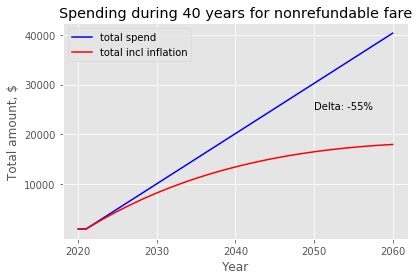

In [24]:
#VISUALISATION

delta = 100*(ins.CI_incl_nonref.max() - ins.total_nonref.max())/ins.total_nonref.max()

plt.plot(ins.year, ins.total_nonref, color = 'blue', label = 'total spend')
plt.plot(ins.year, ins.CI_incl_nonref, color='red', label = 'total incl inflation')

plt.xlabel('Year')
plt.ylabel('Total amount, $')
plt.title('Spending during 40 years for nonrefundable fare')
plt.legend(loc='upper left')

plt.annotate('Delta: ' + str(int(delta)) + '%', xy = (2050, 25000), xytext = (2050, 25000))
#plt.annotate('double-headed arrow', xy=(0.45,0.5), xytext=(0.01,0.5), arrowprops={'arrowstyle': '<->'}, va='center') - NOT WORKING

plt.yticks([10000, 20000, 30000, 40000])
plt.xticks([2020, 2030, 2040, 2050, 2060])

plt.style.use('ggplot')
plt.tight_layout()
plt.savefig(r'files/total_vs_inflation.png')
plt.show()

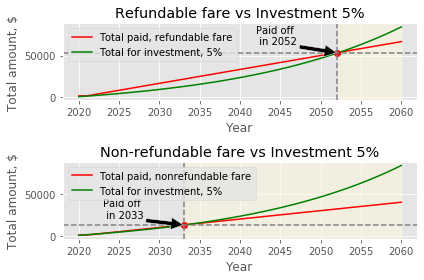

In [25]:
# Plotting chart to discover paid-off time

#REFUNDABLE FARE
# Investment of investment 5% visualisation
fig, ax = plt.subplots(2, 1, sharey = True)
# fig, ax = plt.subplot(2, 1, sharey = True)
ax[0].plot(ins.year, ins.total_ref,color='red', label = 'Total paid, refundable fare')
ax[0].plot(ins.year, ins.end_balance_5pct, color='green', label = 'Total for investment, 5%')

# Intersection point of paid-off with investment 5%
idx5_ref = np.argwhere(np.diff(np.sign(ins.total_ref - ins.end_balance_5pct))).flatten()
ax[0].plot(ins.year[idx5_ref], ins.total_ref[idx5_ref], 'ro')

# Annotations:
year = int(ins.year[idx5_ref])
amount = int(ins.total_ref[idx5_ref])
ax[0].annotate('Paid off\n in ' + str(year), xy = (year,amount), xytext = (year-10, amount+10000), arrowprops = dict(facecolor='black', shrink=0.01))

# Adding lines
ax[0].axhline(amount, color = 'grey', linestyle='--')
ax[0].axvline(year, color='grey', linestyle='--')

# Adding Vertical Spans
ax[0].axvspan(year, ins.year.max(), alpha=0.5, color='cornsilk')

ax[0].set_xlabel('Year')
ax[0].set_ylabel('Total amount, $')
ax[0].legend(loc = 'upper left')

ax[0].set_title('Refundable fare vs Investment 5%')


# NONREFUNDABLE FARE
ax[1].plot(ins.year, ins.total_nonref,color='red', label = 'Total paid, nonrefundable fare')
ax[1].plot(ins.year, ins.end_balance_5pct, color='green', label = 'Total for investment, 5%')

# Intersection point of paid-off with investment 5%
idx5_nonref = np.argwhere(np.diff(np.sign(ins.total_nonref - ins.end_balance_5pct))).max().flatten()
ax[1].plot(ins.year[idx5_nonref], ins.total_nonref[idx5_nonref], 'ro')

# Annotations:
year = int(ins.year[idx5_nonref])
amount = int(ins.total_nonref[idx5_nonref])
ax[1].annotate('Paid off\n in ' + str(year), xy = (year,amount), xytext = (year-10, amount+8000), arrowprops = dict(facecolor='black', shrink=0.01))

# Adding lines
ax[1].axhline(amount, color = 'grey', linestyle='--')
ax[1].axvline(year, color='grey', linestyle='--')

# Adding Vertical Spans
ax[1].axvspan(year, ins.year.max(), alpha=0.5, color='cornsilk')

ax[1].set_xlabel('Year')
ax[1].set_ylabel('Total amount, $')
ax[1].legend(loc = 'upper left')
ax[1].set_title('Non-refundable fare vs Investment 5%')

plt.savefig(r"files/Paid_off_time.jpg")
plt.tight_layout()
plt.show()

In [26]:
# print("Paid-off year with investment 3%: ", ins.year[idx3])
print("Paid-off year with investment 5pct for refundable fare: ", ins.year[idx5_ref])
print("Paid-off year with investment 5pct for nonrefundable fare: ", ins.year[idx5_nonref])

Paid-off year with investment 5pct for refundable fare:  32    2052
Name: year, dtype: int64
Paid-off year with investment 5pct for nonrefundable fare:  13    2033
Name: year, dtype: int64


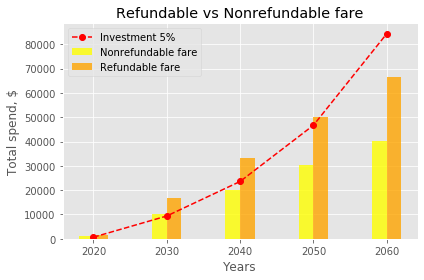

In [27]:
# Visualisation Refundable vs Nonrefundable fare

ins_10 = ins[ins.year % 10 == 0]
width = 2   # the width of the bars

nonref = plt.bar(ins_10.year - width/2, ins_10.total_nonref, width, label='Nonrefundable fare', color='yellow', alpha = 0.8)
ref = plt.bar(ins_10.year + width/2, ins_10.total_ref, width, label='Refundable fare', color='orange', alpha = 0.8)
# inv3 = plt.plot(ins_10.year, ins_10.investment_3pct, label='Investment 3%', color = 'blue', alpha = 1, marker = 'o')

inv5 = plt.plot(ins_10.year, ins_10.end_balance_5pct, label='Investment 5%', color = 'red', alpha = 1, marker = 'o', linestyle = '--')

#### NOT WORKING ####
#fill = plt.fill_between(ins_10.year.min(), ins_10.investment_3pct, color='blue', alpha = 0.1) #### NOT WORKING

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xlabel('Years')
plt.ylabel('Total spend, $')
plt.title('Refundable vs Nonrefundable fare')
plt.legend(loc='upper left')

plt.tight_layout()

plt.savefig(r'files/Ref_vs_nonref.jpg')
plt.show()

In [28]:
ins2060 = ins.loc[ins.year == 2060][['total_nonref', 'total_ref', 'end_balance_5pct']]
ins2060

,total_nonref,total_ref,end_balance_5pct
40,40320,66720,84374


In [29]:
investment = ins2060.end_balance_5pct - ins2060.total_nonref
print('NET amount you will receive in the end of insurance period with 5pct investment:', int(investment))

NET amount you will receive in the end of insurance period with 5pct investment: 44054


In [30]:
ins2060.end_balance_5pct - ins2060.total_ref


40    17654
dtype: int64